In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin

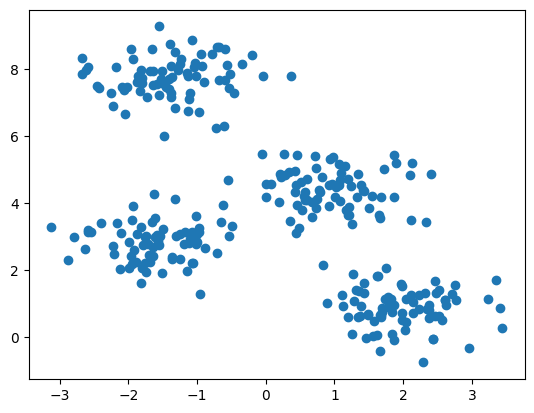

In [3]:
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1]);

In [4]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


KMeans(n_clusters=4)

In [5]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]
[0 1 2 1 0 0 3 2 1 1 3 1 2 1 0 2 2 0 3 3 0 0 2 3 3 2 0 2 3 2 1 1 2 1 1 1 1
 1 3 0 2 3 2 2 3 3 1 3 1 0 3 0 1 0 0 3 1 3 1 0 1 2 1 3 3 3 1 0 1 3 2 3 1 3
 3 1 3 2 0 1 0 2 0 0 1 2 0 2 1 1 2 0 1 3 3 2 0 0 2 3 1 0 1 0 2 0 0 2 1 2 3
 3 0 1 0 2 1 0 0 2 3 0 3 0 0 0 0 3 0 3 1 3 3 0 1 3 3 1 2 1 1 3 2 3 2 3 1 2
 1 1 1 2 1 2 0 3 1 3 0 2 1 2 2 0 2 3 3 2 0 2 2 1 0 2 3 1 0 0 2 3 0 2 3 3 2
 2 2 2 0 1 2 3 2 2 3 3 3 2 3 1 2 3 0 3 2 1 3 1 2 1 2 3 2 2 1 3 3 0 0 2 1 0
 0 3 0 3 2 1 1 2 2 1 2 0 3 2 0 3 1 3 0 2 0 1 1 1 1 3 3 1 2 3 0 2 3 3 3 0 0
 1 2 2 3 0 1 3 2 1 2 0 0 3 3 2 0 0 0 2 1 1 0 0 2 0 0 0 1 3 1 2 0 0 1 1 1 0
 0 2 1 3]


In [6]:
rnd=np.random.RandomState(42)
record_count=X.shape[0]
print(f"record_count is {record_count}")
all_indices=rnd.permutation(record_count)


record_count is 300


In [7]:
X[all_indices[:4]]

array([[-1.80701134,  2.06773859],
       [ 1.4949318 ,  3.85848832],
       [-0.60133739,  6.29994922],
       [-0.71109961,  8.66043846]])

In [8]:
def get_random_centroids(X,cluster_count):
    rnd=np.random.RandomState(42)
    record_count=X.shape[0]
    print(f"record_count is {record_count}")
    permutations=rnd.permutation(record_count)
    random_centroid_idx=permutations[:cluster_count]
    return X[random_centroid_idx]

In [9]:
num_clusters=4
centroids=get_random_centroids(X,4)
centroids

record_count is 300


array([[-1.80701134,  2.06773859],
       [ 1.4949318 ,  3.85848832],
       [-0.60133739,  6.29994922],
       [-0.71109961,  8.66043846]])

In [10]:
blob_centroid_dists=pairwise_distances(X,centroids)
blob_centroid_dists

array([[2.64475855, 1.84358095, 4.40498388, 6.70520522],
       [5.35634748, 4.59025646, 1.37522411, 1.43461742],
       [4.23875818, 1.28678433, 2.12750139, 4.0202685 ],
       ...,
       [3.33713735, 1.25456703, 2.04793782, 4.28185545],
       [6.12323723, 4.09049147, 1.77933415, 1.38686325],
       [0.68210773, 3.46840534, 3.74444601, 6.00869115]])

In [11]:
np.argmin(blob_centroid_dists,axis=1)

array([1, 2, 1, 3, 1, 1, 0, 1, 3, 3, 0, 3, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 3, 2, 1, 2, 3, 3, 3, 3, 0, 1, 1, 0, 2, 1,
       0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 2, 1, 3, 0, 0, 0,
       3, 1, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 1,
       2, 3, 1, 1, 3, 0, 0, 1, 1, 1, 2, 0, 3, 0, 3, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 3, 1, 1, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0,
       0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 1, 0, 2, 1, 2, 3, 3, 1, 2, 1,
       1, 0, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 3, 1, 0, 1, 0, 1, 2, 0, 3, 1, 2, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1,
       3, 1, 1, 0, 1, 0, 1, 2, 3, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1,
       1, 3, 3, 2, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1,
       3, 0, 1, 3, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       2, 0, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 0])

In [13]:
cluster_memberships=pairwise_distances_argmin(X,centroids)
cluster_memberships

array([1, 2, 1, 3, 1, 1, 0, 1, 3, 3, 0, 3, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 3, 2, 1, 2, 3, 3, 3, 3, 0, 1, 1, 0, 2, 1,
       0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 2, 1, 3, 0, 0, 0,
       3, 1, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 1,
       2, 3, 1, 1, 3, 0, 0, 1, 1, 1, 2, 0, 3, 0, 3, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 3, 1, 1, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0,
       0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 1, 0, 2, 1, 2, 3, 3, 1, 2, 1,
       1, 0, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 3, 1, 0, 1, 0, 1, 2, 0, 3, 1, 2, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1,
       3, 1, 1, 0, 1, 0, 1, 2, 3, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1,
       1, 3, 3, 2, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1,
       3, 0, 1, 3, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       2, 0, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 0])

In [14]:
cluster_memberships==0

array([False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,

In [15]:
X[cluster_memberships==0]

array([[-1.80822253,  1.59701749],
       [-1.71237268,  2.77780226],
       [ 1.45513831, -0.029199  ],
       [-1.0669061 ,  3.13165795],
       [-1.07859101,  2.20451529],
       [-1.99648151,  2.85164868],
       [-1.91828017,  2.60516867],
       [-2.88024255,  2.30437816],
       [-2.2029995 ,  2.47947561],
       [-1.98539037,  2.05520738],
       [-1.70200643,  2.46098693],
       [-1.02192525,  2.76820711],
       [-1.55220688,  2.74574995],
       [-1.94972418,  3.4838387 ],
       [-1.11064012,  2.8221382 ],
       [-1.14091533,  1.97550822],
       [-1.03819212,  2.95323761],
       [-2.10956676,  3.10677258],
       [-1.18652985,  2.7842772 ],
       [-1.49720702,  3.21418433],
       [-0.4872713 ,  3.32858293],
       [-1.60496819,  2.9742542 ],
       [-1.50372568,  1.9238532 ],
       [-1.7578319 ,  2.97449321],
       [ 1.25471244,  0.08963316],
       [-1.74572014,  3.01190457],
       [-1.17979111,  3.12767494],
       [-3.12240736,  3.28167398],
       [ 1.66909648,

In [16]:
clusters=[X[cluster_memberships==i] for i in range(0,num_clusters)]

In [17]:
len(clusters)

4

In [18]:
clusters

[array([[-1.80822253,  1.59701749],
        [-1.71237268,  2.77780226],
        [ 1.45513831, -0.029199  ],
        [-1.0669061 ,  3.13165795],
        [-1.07859101,  2.20451529],
        [-1.99648151,  2.85164868],
        [-1.91828017,  2.60516867],
        [-2.88024255,  2.30437816],
        [-2.2029995 ,  2.47947561],
        [-1.98539037,  2.05520738],
        [-1.70200643,  2.46098693],
        [-1.02192525,  2.76820711],
        [-1.55220688,  2.74574995],
        [-1.94972418,  3.4838387 ],
        [-1.11064012,  2.8221382 ],
        [-1.14091533,  1.97550822],
        [-1.03819212,  2.95323761],
        [-2.10956676,  3.10677258],
        [-1.18652985,  2.7842772 ],
        [-1.49720702,  3.21418433],
        [-0.4872713 ,  3.32858293],
        [-1.60496819,  2.9742542 ],
        [-1.50372568,  1.9238532 ],
        [-1.7578319 ,  2.97449321],
        [ 1.25471244,  0.08963316],
        [-1.74572014,  3.01190457],
        [-1.17979111,  3.12767494],
        [-3.12240736,  3.281

In [19]:
new_centroids=np.array([X[cluster_memberships==i].mean() for i in range(0,num_clusters)])
new_centroids

array([0.61573591, 2.06174816, 2.78965798, 3.32652709])

In [20]:
centroids=new_centroids

In [21]:
(centroids-new_centroids)<1e-8

array([ True,  True,  True,  True])

In [ ]:
def Kmeans(X,num_clusters):
    centroids=get_random_centroids(X,cluster_count=num_clusters)
    iter_idx=1
    while True:
        print(f"Iter idx= {iter_idx}")
        cluster_memberships=pairwise_distances_argmin(X,centroids)
        new_centroids=np.array([X[cluster_memberships==i].mean(axis=0) for i in range(0,num_clusters)])

        if np.all(centroids==new_centroids):
            break

        centroids=new_centroids
        iter_idx+=1
    return centroids,labels